# Visualizing the reservoir network

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import cartopy.io.shapereader as shpreader
# import contextily as cx
import geopandas as gpd

/var/folders/2y/h464qnw52wq0lwvhs1s03dy40000gp/T/ipykernel_72297/3758573818.py:7: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
fn = f'../data/reservoir_network_pts/reservoir_network_pts.shp'
network_pts = gpd.read_file(fn, crs='epsg:4326')
network_pts.head()

,id,to_id,index_righ,name,lon,lat,dist [m],min_dist,geometry
0,342.0,373.0,0.0,Big Sandy Dike,-109.432426,42.252083,3905.151771,3905.151771,POINT (-109.40625 42.28125)
1,374.0,404.0,1.0,Eden Dike 1,-109.372287,42.238935,3268.414902,3268.414902,POINT (-109.34375 42.21875)
2,455.0,487.0,2.0,Fontenelle,-110.065625,42.028371,2371.501610,2371.501610,POINT (-110.09375 42.03125)
3,1175.0,1115.0,3.0,Meeks Cabin,-110.582609,41.025296,1151.621410,1151.621410,POINT (-110.59375 41.03125)
4,1238.0,1178.0,4.0,Bor Stateline Summit,-110.386982,40.987986,2688.114995,2688.114995,POINT (-110.40625 40.96875)


In [3]:
fn = f'../data/reservoir_network/reservoir_network.shp'
network = gpd.read_file(fn, crs='epsg:4326')
network.head()

,from_id,to_id,from_name,to_name,length,geometry
0,0.0,5.0,Big Sandy Dike,Flaming Gorge,235268.465352,"LINESTRING (-109.40625 42.28125, -109.40625 40..."
1,5.0,29.0,Flaming Gorge,Glen Canyon,899545.033338,"LINESTRING (-109.40625 40.90625, -111.46875 36..."
2,1.0,5.0,Eden Dike 1,Flaming Gorge,233543.637686,"LINESTRING (-109.34375 42.21875, -109.40625 40..."
3,5.0,29.0,Flaming Gorge,Glen Canyon,897820.205672,"LINESTRING (-109.40625 40.90625, -111.46875 36..."
4,2.0,5.0,Fontenelle,Flaming Gorge,195368.159564,"LINESTRING (-110.09375 42.03125, -109.40625 40..."


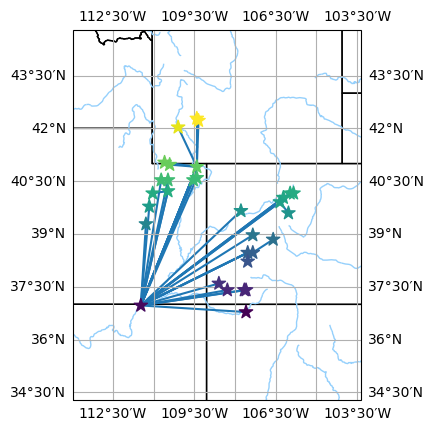

In [4]:
minx, miny, maxx, maxy = network.total_bounds

f = plt.figure()
ax = f.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.set_extent([minx - 2.5, maxx + 2.5, miny - 2.5, maxy + 2.5], crs=ccrs.PlateCarree())
network.plot(ax=ax)
network_pts.plot(ax=ax, markersize=100, marker='*', column='lat', zorder=10)

shapename = 'admin_1_states_provinces_lakes'
states_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

def colorize_state(geometry):
    return {'facecolor': 'none', 'edgecolor': 'black'}

ax.add_geometries(
    shpreader.Reader(states_shp).geometries(),
    ccrs.PlateCarree(),
    styler=colorize_state)
# ax.add_feature(cfeature.RIVERS)
ax.add_feature(cfeature.NaturalEarthFeature(
    category='physical',
    name='rivers_lake_centerlines_scale_rank',
    scale='10m', facecolor='none', edgecolor='xkcd:light blue'
))
# ax.coastlines(resolution='50m')

ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False)



In [5]:
network.total_bounds

array([-111.46875,   36.78125, -105.84375,   42.28125])

# Get names of selected reservoirs

In [6]:
import geopandas as gpd
import os
import shutil

In [7]:
fn = f'../data/selected_reservoirs/selected_reservoirs.shp'
sel_res = gpd.read_file(fn)

sel_res

,DAM_ID,DAM_NAME,STATE,AGENCY_COD,LONG,LAT,TIME_SERIE,TIME_SER_1,INCONSISTE,geometry
0,419,Big Sandy Dike,Wyoming,BOR,-109.432426,42.252083,5/12/70,1/25/21,None,POINT (-109.43243 42.25208)
1,420,Eden Dike 1,Wyoming,BOR,-109.372287,42.238935,7/29/60,1/27/21,None,POINT (-109.37229 42.23893)
2,423,Fontenelle,Wyoming,BOR,-110.065625,42.028371,4/23/64,1/27/21,None,POINT (-110.06562 42.02837)
3,445,Meeks Cabin,Wyoming,BOR,-110.582609,41.025296,5/9/73,1/27/21,None,POINT (-110.58261 41.02530)
4,448,Bor Stateline Summit,Utah,BOR,-110.386982,40.987986,6/28/79,1/27/21,None,POINT (-110.38698 40.98799)
5,451,Flaming Gorge,Utah,BOR,-109.420471,40.915665,11/1/62,1/27/21,None,POINT (-109.42047 40.91566)
6,469,Red Fleet,Utah,BOR,-109.420236,40.577988,5/1/80,1/25/21,None,POINT (-109.42024 40.57799)
7,470,Upper Bor Stillwater,Utah,BOR,-110.701662,40.561752,7/2/89,1/27/21,None,POINT (-110.70166 40.56175)
8,471,Moon Lake,Utah,BOR,-110.489005,40.562222,10/31/74,1/27/21,None,POINT (-110.48901 40.56222)
9,473,Steinaker,Utah,BOR,-109.531250,40.510417,10/1/74,1/25/21,None,POINT (-109.53125 40.51042)


In [9]:
# get these time-series datasets from the larger ground-truth repository
all_data_prefix = "/Users/pdas47/phd/Ground-Truth/USA/ResOpsUS/time_series_all"

for res_id in sel_res['DAM_ID']:
    src_fn = os.path.join(all_data_prefix, f"ResOpsUS_{res_id}.csv")
    dst_fn = f'../data/ts/{res_id}.csv'
    shutil.copy(src_fn, dst_fn)

# Explore the data availability


In [10]:
import xarray as xr
import pandas as pd
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

In [11]:
fn = f'../data/selected_reservoirs/selected_reservoirs.shp'
sel_res = gpd.read_file(fn)

# convert to netcdf
sel_res.rename({
    'TIME_SERIE': 'TS_START',
    'TIME_SER_1': 'TS_END'
}, axis=1, inplace=True)

sel_res.explore()

In [12]:
sel_res['TS_START'] = pd.to_datetime(sel_res['TS_START'])
sel_res['TS_END'] = pd.to_datetime(sel_res['TS_END'])
sel_res.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DAM_ID      31 non-null     int64         
 1   DAM_NAME    31 non-null     object        
 2   STATE       31 non-null     object        
 3   AGENCY_COD  31 non-null     object        
 4   LONG        31 non-null     float64       
 5   LAT         31 non-null     float64       
 6   TS_START    31 non-null     datetime64[ns]
 7   TS_END      31 non-null     datetime64[ns]
 8   INCONSISTE  0 non-null      object        
 9   geometry    31 non-null     geometry      
dtypes: datetime64[ns](2), float64(2), geometry(1), int64(1), object(4)
memory usage: 2.5+ KB


In [13]:
ds = sel_res.set_index('DAM_ID').to_xarray()
ds

<xarray.Dataset>
Dimensions:     (DAM_ID: 31)
Coordinates:
  * DAM_ID      (DAM_ID) int64 419 420 423 445 448 451 ... 572 574 575 597 601
Data variables:
    DAM_NAME    (DAM_ID) object 'Big Sandy Dike' 'Eden Dike 1' ... 'Navajo'
    STATE       (DAM_ID) object 'Wyoming' 'Wyoming' ... 'Arizona' 'New Mexico'
    AGENCY_COD  (DAM_ID) object 'BOR' 'BOR' 'BOR' 'BOR' ... 'BOR' 'BOR' 'BOR'
    LONG        (DAM_ID) float64 -109.4 -109.4 -110.1 ... -107.6 -111.5 -107.6
    LAT         (DAM_ID) float64 42.25 42.24 42.03 41.03 ... 37.38 36.94 36.8
    TS_START    (DAM_ID) datetime64[ns] 2070-05-12 2060-07-29 ... 2062-06-26
    TS_END      (DAM_ID) datetime64[ns] 2021-01-25 2021-01-27 ... 2021-01-27
    INCONSISTE  (DAM_ID) object None None None None None ... None None None None
    geometry    (DAM_ID) object POINT (-109.432426 42.252083) ... POINT (-107...

In [16]:
def get_ts(ts_dir, dam_id):
    fn = os.path.join(ts_dir, f"{dam_id}.csv")
    df = pd.read_csv(fn, parse_dates=['date'])
    df['DAM_ID'] = dam_id

    df.set_index(['DAM_ID', 'date'], inplace=True)

    return df.to_xarray()

ts_dir = '../data/ts'
dam_id = 419
get_ts(ts_dir, dam_id)

<xarray.Dataset>
Dimensions:      (DAM_ID: 1, date: 18522)
Coordinates:
  * DAM_ID       (DAM_ID) int64 419
  * date         (date) datetime64[ns] 1970-05-12 1970-05-13 ... 2021-01-25
Data variables:
    storage      (DAM_ID, date) float64 20.99 nan nan nan ... 9.764 9.764 nan
    inflow       (DAM_ID, date) float64 nan nan nan nan nan ... 0.0 0.0 0.0 nan
    outflow      (DAM_ID, date) float64 nan nan nan nan nan ... 0.0 0.0 0.0 0.0
    evaporation  (DAM_ID, date) float64 nan nan nan nan nan ... nan nan nan nan
    elevation    (DAM_ID, date) float64 2.056e+03 nan nan ... 2.054e+03 nan

In [19]:
# get ts of all reservoirs
TS = xr.merge([get_ts(ts_dir, dam_id) for dam_id in sel_res.DAM_ID])
TS = TS.sel(date=slice("2015-01-01", "2016-01-01"))
TS

<xarray.Dataset>
Dimensions:      (DAM_ID: 31, date: 366)
Coordinates:
  * DAM_ID       (DAM_ID) int64 419 420 423 445 448 451 ... 572 574 575 597 601
  * date         (date) datetime64[ns] 2015-01-01 2015-01-02 ... 2016-01-01
Data variables:
    storage      (DAM_ID, date) float64 25.49 25.53 ... 1.723e+03 1.723e+03
    inflow       (DAM_ID, date) float64 0.728 0.471 0.0 ... 11.64 7.891 4.164
    outflow      (DAM_ID, date) float64 0.0 0.0 0.0 0.0 ... 9.401 9.401 9.429
    evaporation  (DAM_ID, date) float64 nan nan nan nan nan ... nan nan nan nan
    elevation    (DAM_ID, date) float64 2.057e+03 2.057e+03 ... 1.848e+03

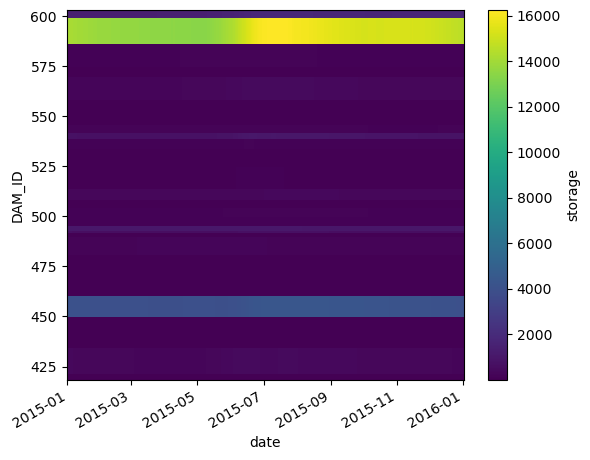

In [20]:
TS['storage'].plot()

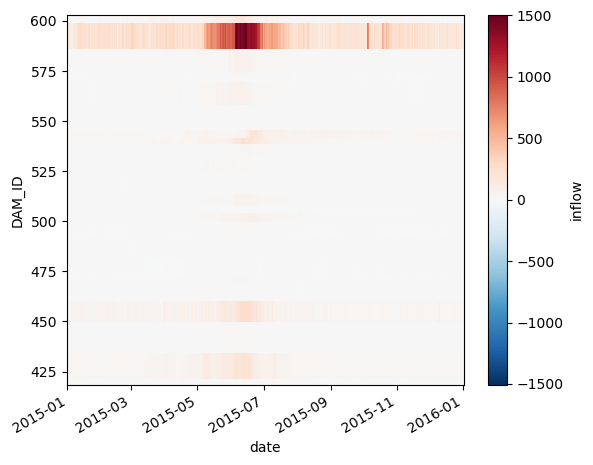

In [21]:
TS['inflow'].plot()

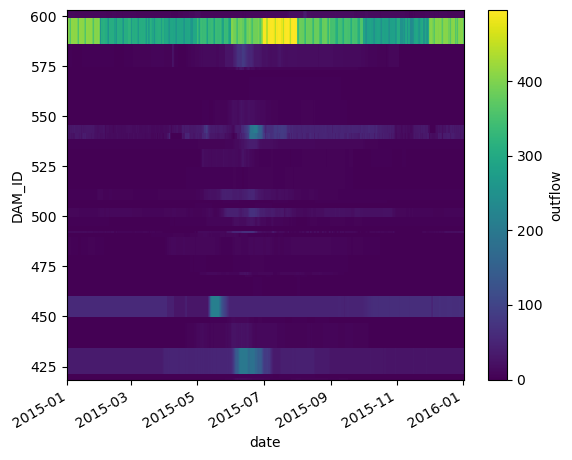

In [22]:
TS['outflow'].plot()

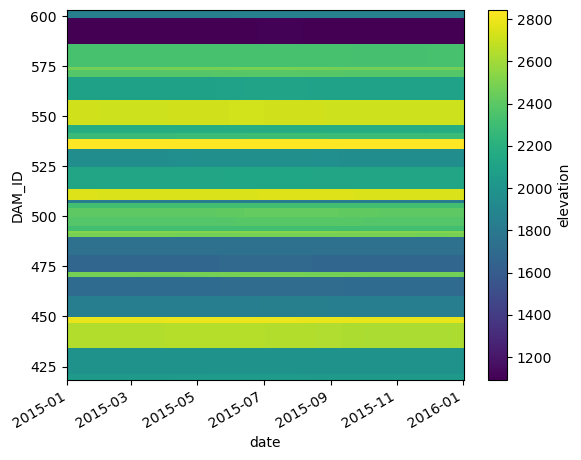

In [23]:
TS['elevation'].plot()

In [24]:
xr.merge([ds, TS]).drop('geometry').sel(date=slice('2010-01-01', '2029-12-31')).to_netcdf('../data/TS_2015.nc')